In [11]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from PIL import Image

import math
from math import fabs

import scipy.ndimage
from scipy import misc

In [4]:
ilosc_katow = 1 #kolumny
ilosc_emiterow = 31 #wiersze
#l = 350 #odleglosc od detektora nr 1 do ostatniego detektora

In [62]:
image = imageio.imread('./tomograf-zdjecia/Kolo.jpg')

In [6]:
n_y = len(image)
n_x = len(image[0])

n_x, n_y

(400, 400)

In [7]:
# poczatkowa pozycja emitera
em_y0 = 0
em_x0 = int(n_x/2)

In [8]:
# poczatkowa pozycja pierwszego detektora jeśli jest ich nieparzyście
det_x0 = em_x0
det_y0 = n_y - 1

(em_x0, em_y0), (det_x0, det_y0)

((200, 0), (200, 399))

In [12]:
def zapalPiksel(x,y, kolor="czarny"):
    if kolor=="czarny":
        wartosc = 255
    elif kolor=="bialy":
        wartosc=0
        
    #image_m[x][y] = wartosc
    try:
      image[x][y] = [wartosc, wartosc, wartosc]
    except:
      pass

In [13]:
### Ogólny algorytm Bresenhama
###############
def algBresenhama(nr_emitera, nr_kata, x1,y1,x2,y2):
#K01: 	Jeżeli x1 ≤ x2, to kx ← 1, inaczej kx ← -1 	; określamy krok X od x1 do x2
    if(x1<=x2):
        kx = 1
    else:
        kx = -1
#K02: 	Jeżeli y1 ≤ y2, to ky ← 1, inaczej ky ← -1 	; określamy krok Y od y1 do y2
    if(y1<=y2):
        ky = 1
    else:
        ky = -1
#K03: 	dx ← |x2 - x1| 	; odległość pomiędzy x1 i x2
    dx = math.fabs(x2 - x1)
#K04: 	dy ← |y2 - y1| 	; odległość pomiędzy y1 i y2
    dy = math.fabs(y2 - y1)
#K05: 	Zapal piksel x1,y1 	; pierwszy piksel odcinka
    zapalPiksel(x1, y1)
#K06: 	Jeżeli dx < dy, idź do kroku K16 	; dla kątów > 45° wykonujemy wersję algorytmu z przestawionymi współrzędnymi
    if(dx < dy):
        #K16: 	e ← dy / 2 	; wersja algorytmu Bresenhama ze zamienionymi współrzędnymi x i y
        e = dy/2
        for i in range(int(dy)):
#K17: 	Powtarzaj dy razy kroki K18...K23 
#K18: 	    y1 ← y1 + ky
            y1 = y1 + ky
#K19: 	    e ← e - dx 
            e = e - dx
#K20: 	    Jeżeli e ≥ 0, idź do kroku K23 	 
            if(e>=0):
                try:
                    #l_op_sinog[nr_emitera][nr_kata] += 1
                    #zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    zapalPiksel(x1, y1)
                except:
                    pass
                zapalPiksel(x1, y1)
            else:
#K21: 	    x1 ← x1 + kx 	 
                x1 = x1 + kx
#K22: 	    e ← e + dy 	 
                e = e + dy
#K23: 	    Zapal piksel x1,y1 	 
                try:
                    #l_op_sinog[nr_emitera][nr_kata] += 1
                    #zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    zapalPiksel(x1, y1)
                except:
                    pass
                zapalPiksel(x1, y2)
    else:
#K07: 	e ← dx / 2 	; obliczamy wartość początkową wyrażenia błędu
        e = (dx/2)
#K08: 	Powtarzaj dx razy kroki K09...K14 	; rysujemy pozostałe piksele w pętli
        for i in range(int(dx)):
#K09: 	    x1 ← x1 + kx 	; przesuwamy się w odpowiednią stronę w kierunku szybkim
            x1 = x1 + kx
#K10: 	    e ← e - dy 	; obliczamy wyrażenie błędu
            e = e - dy
#K11: 	    Jeżeli e ≥ 0, idź do kroku K14 	; jeśli wyrażenie błędu jest nieujemne, pomijamy ruch w kierunku wolnym
            if(e>0):
                try:
                    #l_op_sinog[nr_emitera][nr_kata] += 1
                    #zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    zapalPiksel(x1, y1)
                except:
                    pass
                zapalPiksel(x1, y1)
            else:
#K12: 	    y1 ← y1 + ky 	; przesuwamy się w odpowiednią stronę w kierunku wolnym
                y1 = y1 + ky
#K13: 	    e ← e + dx 	; obliczamy nowe wyrażenie błędu
                e = e + dx
#K14: 	    Zapal piksel x1.y1 	; kolejny piksel odcinka
                try:
                    #l_op_sinog[nr_emitera][nr_kata] += 1
                    #zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    zapalPiksel(x1, y1)
                except:
                    pass
                zapalPiksel(x1, y1)

In [14]:
algBresenhama(1, 1, em_y0, em_x0, det_y0, det_x0) # ___, ____, y1, x1, y2, x2

NameError: name 'em_y0' is not defined

In [12]:
#for x in range(len(image)):
 # for y in range(len(image[x])):
  #  image[x][y] = image[x][y][0]

In [13]:
def arrayToImage(arr, form='RGB'):
    return Image.fromarray(arr, form)
    #img.save('my.png')
    #img.show()

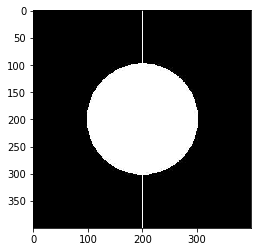

In [14]:
plt.imshow(image)

In [15]:
R = 0.5 * (math.sqrt(n_x**2 + n_y**2))
R

282.842712474619

In [16]:
alfa = math.pi/14
x = math.sin(2*alfa) * R
x

122.7208536706401

In [17]:
def oblicz_polozenie_det_centralnego():
  det_x0 = n_x - em_x0 - 1
  det_y0 = n_y - em_y0 - 1
  return det_x0, det_y0

In [18]:
### pozniej to lepiej zapisa -> podmienianie zmiennych, mniej kodu
def odlicz_dlugosc_od_det_centralnego_gdy_w_centrum(kat):
  # R = 0.5 * (math.sqrt(n_x**2 + n_y**2))
  if em_y0==0 or em_y0 == (n_y - 1):
    linia_nizej = math.sin(2*kat)*R
    y = math.sqrt(R**2 - linia_nizej**2)
    try: 
      #print(det_x0 *(linia_nizej/y))
      return det_x0 *(linia_nizej/y)
    except:
      #print(linia_nizej)
      return linia_nizej
  elif em_x0==0 or em_x0 == (n_x - 1):
    linia_nizej = math.sin(2*kat)*R
    y = math.sqrt(R**2 - linia_nizej**2)
    try: 
      #print(det_y0 *(linia_nizej/y))
      return det_y0 *(linia_nizej/y)
    except:
      #print(linia_nizej)
      return linia_nizej

In [19]:
def odlicz_dlugosc_od_det_centralnego_gdy_w_wierzcholku(kat):
  print(2*R*math.sin(kat)/math.sin((3/4)*math.pi - kat))
  return 2*R*math.sin(kat)/math.sin((3/4)*math.pi - kat)

In [20]:
def odlicz_dlugosc_od_det_centralnego_gdy_pomiedzy(kat):
  TODO

In [21]:
def oblicz_polozenie_det2_gdy_w_centrum(kat, w_strone="prawo"):
  if em_y0==0 or em_y0 == (n_y - 1):
    p = n_x/2
    #a = 2*R*math.sin(math.pi - kat)
    #b = 2*R*math.sin(kat)
    a = p / math.sin(kat)
    x1 = math.sqrt(a**2 - p**2)
    x2 = 2*R - x1
  
    suma_x = x1 + x2 # jest to długość równa dł. wysokości boku + 2 x 'dodatki' (odległości miedzy bokiem a okręgiem)
    dodatki2 = suma_x - n_y
    dodatek = dodatki2/2
    #print(dodatek)
    polozenie_w_y = x1 - dodatek
    if w_strone=="prawo":
      dx2 = n_x - 1
      if em_y0 == 0:
        dy2 = polozenie_w_y
      else:
        dy2 = em_y0 - polozenie_w_y
    elif w_strone=="lewo":
      dx2 = 0
      if em_y0 == 0:
        dy2 = polozenie_w_y
      else:
        dy2 = em_y0 - polozenie_w_y
    m = dodatek + polozenie_w_y
    rozstaw = dodatek * p / m
    if w_strone=="prawo":
      #print("sss")
      #print(rozstaw)
      dx1 = p + rozstaw 
      dy1 = em_y0
    elif w_strone=="lewo":
      dx1 = p - rozstaw
      dy1 = em_y0

    return int(dx1), int(dy1), int(dx2), int(dy2)
    #################
  if em_x0==0 or em_x0 == (n_x - 1):
    p = n_y/2
    #a = 2*R*math.sin(math.pi - kat)
    #b = 2*R*math.sin(kat)
    a = p / math.sin(kat)
    y1 = math.sqrt(a**2 - p**2)
    y2 = 2*R - y1
  
    suma_y = y1 + y2 # jest to długość równa dł. wysokości boku + 2 x 'dodatki' (odległości miedzy bokiem a okręgiem)
    dodatki2 = suma_y - n_x
    dodatek = dodatki2/2
    #print(dodatek)
    polozenie_w_x = y1 - dodatek
    if w_strone=="prawo":
      if em_x0 == 0:
        dx2 = polozenie_w_x
      else:
        dx2 = em_x0 - polozenie_w_x
      dy2 = n_y - 1
    elif w_strone=="lewo":
      if em_x0 == 0:
        dx2 = polozenie_w_x
      else:
        dx2 = em_x0 - polozenie_w_x
      dy2 = 0
    m = dodatek + polozenie_w_x
    rozstaw = dodatek * p / m
    if w_strone=="prawo":
      #print("sss")
      #print(rozstaw)
      dx1 = em_x0
      dy1 = p + rozstaw 
      print(p, rozstaw)
    elif w_strone=="lewo":
      dx1 = em_x0
      dy1 = p - rozstaw
      print(p, rozstaw)

    return int(dx1), int(dy1), int(dx2), int(dy2)


In [22]:
def oblicz_polozenie_det_gdy_w_centrum(kat, w_strone="prawo"):
  odl = odlicz_dlugosc_od_det_centralnego_gdy_w_centrum(kat)
  if em_y0==0 or em_y0 == (n_y - 1):
    if w_strone=="prawo":
      w = det_x0 + odl
      if w <= n_x:
        dx2 = w
        dy2 = det_y0
      else:
        #print("dd")
        return oblicz_polozenie_det2_gdy_w_centrum(kat, "prawo")
    elif w_strone=="lewo":
      w = det_x0 - odl
      if w >= 0:
        dx2 = w
        dy2 = det_y0
      else:
        return oblicz_polozenie_det2_gdy_w_centrum(kat, "lewo")
    dodatki2 = 2*R - n_y
    dodatek = dodatki2 / 2
    k = dodatek + n_y
    x = dodatek * odl / k

    if w_strone=="prawo":
      dx1 = n_x/2 + x
    elif w_strone=="lewo":
      dx1 = n_x/2 - x
    dy1 = em_y0

    return int(dx1), int(dy1), int(dx2), int(dy2)
#########
  elif em_x0==0 or em_x0 == (n_x - 1):
    if w_strone=="prawo":
      w = det_y0 + odl
      if w <= n_y:
        dx2 = det_x0
        dy2 = w
      else:
        #print("dd")
        return oblicz_polozenie_det2_gdy_w_centrum(kat, "prawo")
    elif w_strone=="lewo":
      w = det_y0 - odl
      if w >= 0:
        dx2 = det_x0
        dy2 = w
      else:
        return oblicz_polozenie_det2_gdy_w_centrum(kat, "lewo")
    dodatki2 = 2*R - n_y
    dodatek = dodatki2 / 2
    k = dodatek + n_y
    x = dodatek * odl / k

    if w_strone=="prawo":
      dy1 = n_y/2 + x
    elif w_strone=="lewo":
      dy1 = n_y/2 - x
    dx1 = em_x0

    return int(dx1), int(dy1), int(dx2), int(dy2)

## Próba rozstawienia detektorów dla podanej rozwartości kąta

In [23]:
kat_rozw = 0.6 * math.pi
l = R * kat_rozw

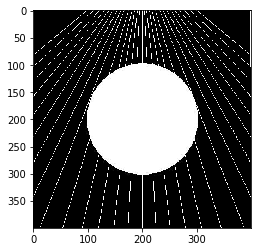

In [24]:
#### gdy nieparzysta ilosc detektorów:
# narysuj prosta linie przechodzaca przez srodek
# kazda z czesci (lewa i prawa) podzielona na (n-1)/2 czesci
ilosc_czesci_kata_dla_obu_stron = (ilosc_emiterow-1)
# czyli pojedynczy kat wyniesie
kat_p = (kat_rozw/ilosc_czesci_kata_dla_obu_stron)
kat = kat_p
it = int((ilosc_emiterow-1)/2)
for i in range(1, it):
  dx1, dy1, dx2, dy2 = oblicz_polozenie_det_gdy_w_centrum(kat, w_strone="prawo")
  algBresenhama(1, 1, dy1, dx1, dy2, dx2)
  dx1, dy1, dx2, dy2 = oblicz_polozenie_det_gdy_w_centrum(kat, w_strone="lewo")
  algBresenhama(1, 1, dy1, dx1, dy2, dx2)
  kat = kat + kat_p
plt.imshow(image)

In [25]:
def przesun_emiter(kat):
  if kat == math.pi/2:
    return n_x - 1, int(n_y/2)
  elif kat == math.pi:
    return int(n_x/2), n_y - 1
  elif kat == 3 * math.pi/2:
    return 0, int(n_y/2)
  else:
    x = int(math.tan(kat) * n_y/2)
    pos = int((n_x)/2 + x)
    if(pos <= (n_x - 1)):
      return pos, 0
    else:
      pass

In [26]:
em_x0, em_y0 = przesun_emiter(math.pi)
det_x0, det_y0 = oblicz_polozenie_det_centralnego()
em_x0, em_y0, det_x0, det_y0

(200, 399, 199, 0)

In [27]:
image = imageio.imread('./tomograf-zdjecia/Kolo.jpg')

In [39]:
from datetime import datetime 

name = input('Please enter a patient name: ')
surname = input('Please enter a patient surname: ')
date_str = input('Please enter a date of a research in type \'dd/mm/yy\': ')
date = datetime.strptime(date_str, '%d/%m/%y').date()
patientId = input('Please, input patient id:')

comments = input('Please enter some comments: ')

Please enter a patient name: vfgd
Please enter a patient surname: dfsefw
Please enter a date of a research in type 'dd/mm/yy': 12/02/98
Please, input patient id:1
Please enter some comments: addaf


Center:  200.0 z:  400  i  400
Górna czesc kola:  -82.84271247461902
Dolna czesc kola:  482.842712474619
Radius:  282.842712474619


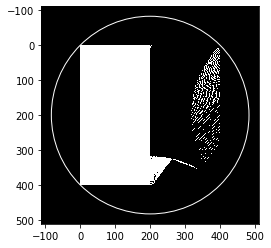

In [59]:
from bresenham import bresenham

image = imageio.imread('./tomograf-zdjecia/Paski2.jpg')
center = max(len(image), len(image[0]))/2
circleRed = plt.Circle((center, center), center * math.sqrt(2), edgecolor='w', facecolor='none')

fig, ax = plt.subplots() 
ax.set_facecolor('black')
im = plt.imshow(image)

height_y = center - (center * math.sqrt(2) / 2)
low_y = center + (center * math.sqrt(2) / 2)
radius = center * 2 * math.sqrt(2) / 2      #od_srodka do boku * 2 * sqrt(2)\n",

print('Center: ', center, 'z: ', len(image), ' i ', len(image[0]))
print('Górna czesc kola: ', center - (center * 2 * math.sqrt(2) / 2))
print('Dolna czesc kola: ', center + center * 2 * math.sqrt(2) / 2)
print('Radius: ', radius)

kat = math.pi/14            #TODO: kat ma byc podawany przez uzytkownika
l_det = 140
max_rozwarcie = 0.6 * 2 * math.pi

em_x = int(center + radius * math.cos(kat))
em_y = int(center + radius * math.sin(kat))
           
if (em_x > low_y):
    em_x = int(center - radius * math.cos(kat))

if (em_y > low_y):
    em_y = int(center - radius * math.sin(kat))


for detector in range(l_det):
    det_x = int(center + radius * math.cos(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
    if (det_x > low_y):
        det_x = int(center - radius * math.cos(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
    det_y = int(center + radius * math.sin(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
    if (det_y > low_y):
        det_y = int(center - radius * math.sin(kat + math.pi - max_rozwarcie/2 + detector * max_rozwarcie/ (l_det - 1)))
    #print('Emiter (x,y): ', em_x, em_y, 'Detektor (x,y): ', det_x, det_y)
    #algBresenhama(1, 1, em_x, em_y, det_x, det_y)
    points = list(bresenham(em_x, em_y, det_x, det_y))
    for x, y in points:
        image[x][y] = [255, 255, 255]              #255 -> bialy, 0 -> czarny
        #print("wstawiam 0 na ", x, y)
        
        
#zamiast tego stworzyc funkcje ze wzorami ilosc emiterow


im = plt.imshow(image)
ax.add_patch(circleRed)
plt.plot()

fig.savefig('./tomograf-zdjecia/Paski.png')

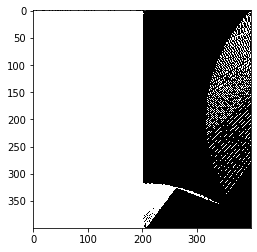

In [60]:
plt.imshow(image)